<a href="https://colab.research.google.com/github/lotaa/AI-platform-notesbook-/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example OF creating a CNN model vgg blocks

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 256)     7168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 256)     590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 256)     0         
Total params: 597,248
Trainable params: 597,248
Non-trainable params: 0
_________________________________________________________________


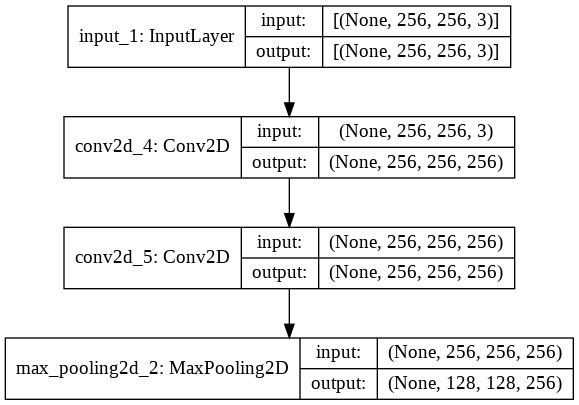

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils.vis_utils import plot_model 

# function for creating a vgg block
def vgg_block(layer_in, n_filter, n_conv):
  # add convolutional layer
  for _ in range(n_conv):
    layer_in = Conv2D(n_filter, (3,3), padding ='same' ,activation ='relu')(layer_in)
  # add Maxpooling layer
  layer_in = MaxPooling2D((2,2,), strides= (2,2))(layer_in)
  return layer_in

#define a model input 
visible = Input(shape=(256,256,3))

#add vgg model
layer = vgg_block(visible,64,2)

#add vgg model
layer = vgg_block(visible,128,2)

#add vgg model
layer = vgg_block(visible,256,2)

model = Model(inputs= visible, outputs=layer)

#summarize model
model.summary()

#plot model architecture
plot_model (model, show_shapes= True, to_file ='multiple_vgg_blocks.png')